#  Fruits: Retail Prices of Agricultural Commodities by Geolocation, Commodity, Year and Period
Problems: 
1. What fruit prices are expected to increase and decrease?
2. What place/s sell fruits at higher prices
3. Does seasons affect fruit prices

Goal:
1. Find the specialty of each province.
2. Forecast fruit prices.
3. Find out the effect of seasons on fruit prices.

dataset from:\
https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2M__2018/0042M4ARA07.px/?rxid=7d5d3588-67ae-4206-8670-09322cda2f17

# Methodology
1. Reading and Understanding the Data\
a. Creating a Data Dictionary
2. Data Cleaning
3. Data Preparation
4. Statistical Data Analysis\
a. Univariate Analysis\
b. Bivariate Analysis
5. Final Analysis

### 1. Reading and Understanding the Data

In [34]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [35]:
# 1. Reading the data on which analysis needs to be done

df = pd.read_excel("Retail prices of fruits by region 2018-2024.xlsx", header=3)
df = df[:-31]

df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.9,119.9,130.43,119.89,119.89,121.5,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,..,..,..,..
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31,31.67,31.33,33.5,..,..,..,..


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18 non-null     object
 1   Unnamed: 1   648 non-null    object
 2   January      648 non-null    object
 3   February     648 non-null    object
 4   March        648 non-null    object
 5   April        648 non-null    object
 6   May          648 non-null    object
 7   June         648 non-null    object
 8   July         648 non-null    object
 9   August       648 non-null    object
 10  September    648 non-null    object
 11  October      648 non-null    object
 12  November     648 non-null    object
 13  December     648 non-null    object
 14  Annual       648 non-null    object
 15  January.1    648 non-null    object
 16  February.1   648 non-null    object
 17  March.1      648 non-null    object
 18  April.1      648 non-null    object
 19  May.1        648 non-null    

In [37]:
df.describe()

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
count,18,648,648,648,648,648,648,648,648,648,...,648,648,648,648,648,648,648,648,648,648
unique,18,36,288,286,288,289,287,287,288,287,...,283,281,278,270,280,278,1,1,1,1
top,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,18,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,648,648,648,648


In [38]:
df.replace("..", np.nan, inplace=True)

<Axes: >

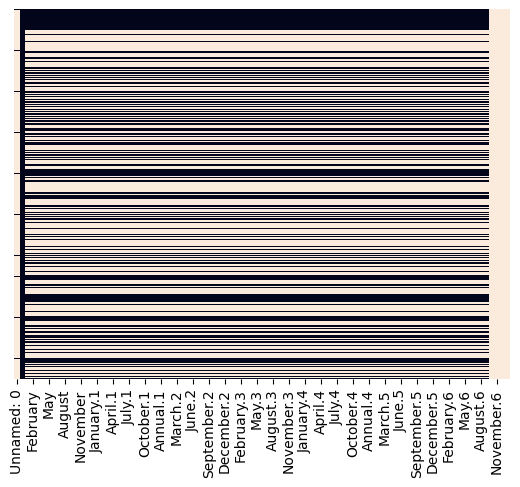

In [39]:
# check for nulls
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [40]:
df.tail(5)

,Unnamed: 0,Unnamed: 1,January,February,March,April,May,June,July,August,...,April.6,May.6,June.6,July.6,August.6,September.6,October.6,November.6,December.6,Annual.6
643,NaN,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,"CALAMANSI, LOOSE, 1 KG",119.90,119.90,130.43,119.89,119.89,121.50,120.22,120.97,...,56.17,56.67,58.46,56.78,56.71,57.57,NaN,NaN,NaN,NaN
645,NaN,"FRESH FRUIT, APPLE, RED DELICIOUS, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,NaN,"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",18.51,18.51,17.77,19.75,19.75,19.75,19.75,19.75,...,34.58,33.33,31.00,31.67,31.33,33.50,NaN,NaN,NaN,NaN


In [41]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
# Convert the Series to a DataFrame and display it
df_null = df_null.reset_index()
df_null.columns = ['Column', 'Percentage']
df_null

,Column,Percentage
0,Unnamed: 0,97.22
1,Unnamed: 1,0.00
2,January,55.25
3,February,55.25
4,March,55.25
...,...,...
88,September.6,55.25
89,October.6,100.00
90,November.6,100.00
91,December.6,100.00


### 2. Data Cleaning

In [42]:
# Forward-fill the regions (Unnamed: 0) and product names (Unnamed: 1) to deal with the multi-level structure
df['Unnamed: 0'].fillna(method='ffill', inplace=True)  # Regions
df['Unnamed: 1'].fillna(method='ffill', inplace=True)  # Products


df.rename(columns={'Unnamed: 0': 'Region', 'Unnamed: 1': 'Product'}, inplace=True)

df_cleaned = df.loc[:, ~df.columns.str.contains('Annual')]

years = []
current_year = 2018  

for col in df_cleaned.columns[2:]:  
    if 'January' in col:
        years.append(str(current_year))
        current_year += 1
    else:
        years.append(str(current_year - 1))  

# Assign the months in a repeating sequence (January to December)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_repeated = months * (len(df_cleaned.columns[2:]) // 12)

# Create a MultiIndex for the columns with Year and Month
df_cleaned.columns = pd.MultiIndex.from_tuples([('Region', ''), ('Product', '')] + list(zip(years, months_repeated)))

# Melt the data with Region and Product as identifiers
df_melted = pd.melt(
    df_cleaned, 
    id_vars=['Region', 'Product'], 
    var_name=['Year', 'Month'], 
    value_name='Price'
)

# Replace '..' with NaN and drop rows where Price is NaN
df_melted.replace('..', pd.NA, inplace=True)
df_melted.dropna(subset=['Price'], inplace=True)

df_melted.tail() 

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\1457148109.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\1457148109.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Region,Product,Year,Month,Price
52473,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, GRAPES, 1 KG",2024,September,305.00
52478,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, LANZONES, 1 KG",2024,September,59.00
52479,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, RAMBUTAN, 1 KG",2024,September,60.00
52484,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"CALAMANSI, LOOSE, 1 KG",2024,September,57.57
52487,..AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",2024,September,33.50


In [43]:
df_melted.to_csv('prutas_long.csv')

In [44]:
df_melted['Region'] = df_melted['Region'].str.replace('.', '', regex=False)
df_melted.tail(5)

,Region,Product,Year,Month,Price
52473,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, GRAPES, 1 KG",2024,September,305.00
52478,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, LANZONES, 1 KG",2024,September,59.00
52479,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, RAMBUTAN, 1 KG",2024,September,60.00
52484,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"CALAMANSI, LOOSE, 1 KG",2024,September,57.57
52487,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),"FRESH FRUIT, WATERMELON, PAKWAN, MEDIUM, 1 KG",2024,September,33.50


In [45]:
# Extract the abbreviation enclosed in parentheses from the Region column
df_melted['Region Abbreviation'] = df_melted['Region'].str.extract(r'\((.*?)\)')

# Remove the copied part in Region
df_melted['Region'] = df_melted['Region'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

df_melted.head()

,Region,Product,Year,Month,Price,Region Abbreviation
0,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",2018,January,63.90,NaN
1,PHILIPPINES,"FRESH FRUIT, BANANA, CARDAVA, MEDIUM, 1 KG",2018,January,26.68,NaN
2,PHILIPPINES,"FRESH FRUIT, BANANA, LAKATAN, MEDIUM, 1 KG",2018,January,52.06,NaN
3,PHILIPPINES,"FRESH FRUIT, BANANA, LATUNDAN, MEDIUM, 1 KG",2018,January,36.55,NaN
4,PHILIPPINES,"FRESH FRUIT, BANANA, SABA, MEDIUM, 1 KG",2018,January,32.33,NaN


In [46]:
# creating data dictionary

import_des = {
    "Region": "Geographical area where the data was collected",
    "Product": "Fruit being analyzed",
    "Year": "Year of the recorded price",
    "Month": "Month of the recorded price",
    "Price": "Retail price of the fruit in the specified month and year"
}

data_dictionary_retail = pd.DataFrame({
    'Column Name': df_melted.columns,
    'Description': [import_des.get(col, 'Year and Quadrant values') for col in df_melted.columns],
    'Data Type': df_melted.dtypes.values
})

In [47]:
data_dictionary_retail

,Column Name,Description,Data Type
0,Region,Geographical area where the data was collected,object
1,Product,Fruit being analyzed,object
2,Year,Year of the recorded price,object
3,Month,Month of the recorded price,object
4,Price,Retail price of the fruit in the specified mon...,float64
5,Region Abbreviation,Year and Quadrant values,object


In [48]:
# Check for rows with any null values in df_melted
null_rows = df_melted[df_melted.isnull().any(axis=1)]
null_rows

,Region,Product,Year,Month,Price,Region Abbreviation
0,PHILIPPINES,"FRESH FRUIT, AVOCADO, 1 KG",2018,January,63.90,NaN
1,PHILIPPINES,"FRESH FRUIT, BANANA, CARDAVA, MEDIUM, 1 KG",2018,January,26.68,NaN
2,PHILIPPINES,"FRESH FRUIT, BANANA, LAKATAN, MEDIUM, 1 KG",2018,January,52.06,NaN
3,PHILIPPINES,"FRESH FRUIT, BANANA, LATUNDAN, MEDIUM, 1 KG",2018,January,36.55,NaN
4,PHILIPPINES,"FRESH FRUIT, BANANA, SABA, MEDIUM, 1 KG",2018,January,32.33,NaN
...,...,...,...,...,...,...
52121,MIMAROPA REGION,"FRESH FRUIT, ORANGE, DALANDAN, MEDIUM, 1 KG",2024,September,95.32,NaN
52123,MIMAROPA REGION,"FRESH FRUIT, MANDARIN, DALANGHITA, MEDIUM, 1 KG",2024,September,52.61,NaN
52124,MIMAROPA REGION,"CALAMANSI, LOOSE, 1 KG",2024,September,84.38,NaN
52126,MIMAROPA REGION,"FRESH FRUIT, CANTALOUPE, MELON, MEDIUM, 1 KG",2024,September,85.83,NaN


    There are no more null rows with the melted df

In [49]:
# Check for duplicates in the dataframe
duplicates = df_melted[df_melted.duplicated()]
duplicates

,Region,Product,Year,Month,Price,Region Abbreviation


    There are no duplicated values

### 3. Data Preparation

In [50]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 0 to 52487
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               23490 non-null  object 
 1   Product              23490 non-null  object 
 2   Year                 23490 non-null  object 
 3   Month                23490 non-null  object 
 4   Price                23490 non-null  float64
 5   Region Abbreviation  19359 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [51]:
# Remove the string "FRESH FRUIT" and "1 KG" from the Product column
df_melted['Product'] = df_melted['Product'].str.replace('FRESH FRUIT, ', '')
df_melted['Product'] = df_melted['Product'].str.replace(', 1 KG', '')

# Display the updated dataframe
df_melted.tail(30)

,Region,Product,Year,Month,Price,Region Abbreviation
52415,REGION XII,"WATERMELON, PAKWAN, MEDIUM",2024,September,42.50,SOCCSKSARGEN
52416,REGION XIII,AVOCADO,2024,September,122.00,Caraga
52418,REGION XIII,"BANANA, LAKATAN, MEDIUM",2024,September,72.42,Caraga
52419,REGION XIII,"BANANA, LATUNDAN, MEDIUM",2024,September,37.40,Caraga
52422,REGION XIII,"MANGO, CEBU, RIPE, MEDIUM",2024,September,112.50,Caraga
52424,REGION XIII,"MANGO, KALABAW, RIPE, MEDIUM",2024,September,189.67,Caraga
52429,REGION XIII,"PAPAYA, MEDIUM",2024,September,53.35,Caraga
52430,REGION XIII,"PAPAYA, NATIVE, MEDIUM",2024,September,41.88,Caraga
52436,REGION XIII,"PINEAPPLE, PINYA, MEDIUM",2024,September,53.70,Caraga
52442,REGION XIII,LANZONES,2024,September,91.75,Caraga


In [52]:
# Data Frame for PH (overall)

df_ph = df_melted[df_melted['Region'] == 'PHILIPPINES']
df_ph

,Region,Product,Year,Month,Price,Region Abbreviation
0,PHILIPPINES,AVOCADO,2018,January,63.90,NaN
1,PHILIPPINES,"BANANA, CARDAVA, MEDIUM",2018,January,26.68,NaN
2,PHILIPPINES,"BANANA, LAKATAN, MEDIUM",2018,January,52.06,NaN
3,PHILIPPINES,"BANANA, LATUNDAN, MEDIUM",2018,January,36.55,NaN
4,PHILIPPINES,"BANANA, SABA, MEDIUM",2018,January,32.33,NaN
...,...,...,...,...,...,...
51871,PHILIPPINES,"MANDARIN, DALANGHITA, MEDIUM",2024,September,73.26,NaN
51872,PHILIPPINES,"CALAMANSI, LOOSE",2024,September,80.70,NaN
51873,PHILIPPINES,"APPLE, RED DELICIOUS, MEDIUM",2024,September,126.85,NaN
51874,PHILIPPINES,"CANTALOUPE, MELON, MEDIUM",2024,September,59.13,NaN


In [53]:
# Data Frame for Regions (exlcuding PH)

df_regions = df_melted[df_melted['Region'] != 'PHILIPPINES']
df_regions

,Region,Product,Year,Month,Price,Region Abbreviation
36,National Capital Region,AVOCADO,2018,January,157.40,NCR
38,National Capital Region,"BANANA, LAKATAN, MEDIUM",2018,January,66.96,NCR
44,National Capital Region,"MANGO, KALABAW, RIPE, MEDIUM",2018,January,168.49,NCR
56,National Capital Region,"PINEAPPLE, PINYA, MEDIUM",2018,January,58.23,NCR
57,National Capital Region,GRAPES,2018,January,251.95,NCR
...,...,...,...,...,...,...
52473,AUTONOMOUS REGION IN MUSLIM MINDANAO,GRAPES,2024,September,305.00,ARMM
52478,AUTONOMOUS REGION IN MUSLIM MINDANAO,LANZONES,2024,September,59.00,ARMM
52479,AUTONOMOUS REGION IN MUSLIM MINDANAO,RAMBUTAN,2024,September,60.00,ARMM
52484,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",2024,September,57.57,ARMM


In [54]:
# Adding region abbreviation column + extracting ABV from 'Region' column

df_regions['Region Abbreviation'] = df_regions['Region'].str.extract(r'\((.*?)\)')

df_regions['Region'] = df_regions['Region'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

df_regions.head()


C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\2598143035.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\2598143035.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Month,Price,Region Abbreviation
36,National Capital Region,AVOCADO,2018,January,157.40,NaN
38,National Capital Region,"BANANA, LAKATAN, MEDIUM",2018,January,66.96,NaN
44,National Capital Region,"MANGO, KALABAW, RIPE, MEDIUM",2018,January,168.49,NaN
56,National Capital Region,"PINEAPPLE, PINYA, MEDIUM",2018,January,58.23,NaN
57,National Capital Region,GRAPES,2018,January,251.95,NaN


In [55]:
# Data frame for yearly aggregation of each product
# Eg: Apples in Region V on the whole duration of 2018, the price was said to be 140.77 PHP

df_regions_aggregated_product = df_regions.groupby(['Product', 'Region', 'Region Abbreviation', 'Year'])['Price'].mean().reset_index()
df_regions_aggregated_product

,Product,Region,Region Abbreviation,Year,Price


In [56]:
# Retrieving the specific month in a year where the price of a fruit was the highest & the month where it was the lowest

# Convert the 'Price' column to numeric, just in case
df_regions['Price'] = pd.to_numeric(df_regions['Price'], errors='coerce')

# Group the data by 'Region', 'Product', and 'Year'
# Find the month with the maximum and minimum prices for each product in each region and year
max_min_price_per_fruit = df_regions.groupby(['Region', 'Product', 'Year']).apply(
    lambda x: pd.Series({
        'Max Month': x.loc[x['Price'].idxmax(), 'Month'],  # Month with highest price
        'Max Price': x['Price'].max(),                    # Maximum price
        'Min Month': x.loc[x['Price'].idxmin(), 'Month'],  # Month with lowest price
        'Min Price': x['Price'].min()                     # Minimum price
    })
).reset_index()

# Display the result
max_min_price_per_fruit


C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\1416671294.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Max Month,Max Price,Min Month,Min Price
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,March,52.82,October,48.17
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,November,53.11,May,47.99
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,August,67.86,March,52.00
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2021,March,68.49,December,65.39
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2022,June,68.88,October,57.68
...,...,...,...,...,...,...,...
1773,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2020,May,29.83,January,26.19
1774,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2021,January,30.55,September,24.17
1775,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,July,35.00,May,27.50
1776,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,February,41.67,June,28.83


In [57]:
# Aggregating the price of a product from a certain region, in a specific year
# Eg. In 2018, the average price of an avocado in ARMM during the Dry Season was X, while the price during the Rainy Season was Y

season_mapping = {
    'January': 'Dry', 'February': 'Dry', 'March': 'Dry', 'April': 'Dry', 'May': 'Dry',
    'June': 'Rainy', 'July': 'Rainy', 'August': 'Rainy', 'September': 'Rainy',
    'October': 'Rainy', 'November': 'Rainy', 'December': 'Dry'
}

# Add a 'Season' column to the DataFrame
df_regions['Season'] = df_regions['Month'].map(season_mapping)

# Now, group by Region, Product, Year, and Season to get the average price
seasonal_prices = df_regions.groupby(['Region', 'Product', 'Year', 'Season'])['Price'].mean().reset_index()

# Display the result to inspect
seasonal_prices

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\3346689001.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Season,Price
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,Dry,50.786667
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,Rainy,49.996667
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,Dry,49.890000
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,Rainy,51.665000
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,Dry,57.180000
...,...,...,...,...,...
3551,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,Rainy,31.778333
3552,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,Dry,39.305000
3553,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,Rainy,32.666667
3554,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2024,Dry,33.166000


In [58]:
# Comparison of the average price of a fruit during the rainy and dry season (difference)

dry_vs_rainy_yearly = seasonal_prices.pivot_table(index=['Region', 'Product', 'Year'], 
                                                  columns='Season', values='Price').reset_index()

dry_vs_rainy_yearly['Yearly Average'] = dry_vs_rainy_yearly[['Dry', 'Rainy']].mean(axis=1)

dry_vs_rainy_yearly['Difference (Dry - Rainy)'] = dry_vs_rainy_yearly['Dry'] - dry_vs_rainy_yearly['Rainy']

dry_vs_rainy_yearly

Season,Region,Product,Year,Dry,Rainy,Yearly Average,Difference (Dry - Rainy)
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2018,50.786667,49.996667,50.391667,0.790000
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2019,49.890000,51.665000,50.777500,-1.775000
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2020,57.180000,66.830000,62.005000,-9.650000
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2021,66.990000,67.318333,67.154167,-0.328333
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,2022,65.656667,62.830000,64.243333,2.826667
...,...,...,...,...,...,...,...
1773,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2020,28.433333,28.918333,28.675833,-0.485000
1774,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2021,29.070000,25.861667,27.465833,3.208333
1775,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2022,30.500000,31.778333,31.139167,-1.278333
1776,REGION XIII,"WATERMELON, PAKWAN, MEDIUM",2023,39.305000,32.666667,35.985833,6.638333


In [59]:
# Group by Region and Product, and calculate the average (mean) across all years (2018-2023/2024)
dry_vs_rainy_aggregated = dry_vs_rainy_yearly.groupby(['Region', 'Product']).agg({
    'Dry': 'mean',
    'Rainy': 'mean',
    'Yearly Average': 'mean',
    'Difference (Dry - Rainy)': 'mean'
}).reset_index()

# Display the resulting DataFrame
dry_vs_rainy_aggregated

Season,Region,Product,Dry,Rainy,Yearly Average,Difference (Dry - Rainy)
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,AVOCADO,60.040619,60.547262,60.293940,-0.506643
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, LAKATAN, MEDIUM",51.957524,51.954643,51.956083,0.002881
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, LATUNDAN, MEDIUM",35.738143,35.235833,35.486988,0.502310
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,"BANANA, SABA, MEDIUM",31.579619,32.045595,31.812607,-0.465976
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",77.067095,72.495476,74.781286,4.571619
...,...,...,...,...,...,...
249,REGION XIII,"PAPAYA, MEDIUM",43.656810,44.214524,43.935667,-0.557714
250,REGION XIII,"PAPAYA, NATIVE, MEDIUM",37.381857,37.358690,37.370274,0.023167
251,REGION XIII,"PINEAPPLE, PINYA, MEDIUM",46.053238,46.185714,46.119476,-0.132476
252,REGION XIII,"POMELO, MEDIUM",84.750000,89.246429,86.998214,-4.496429


In [60]:
# Top products per region with large differences in dry vs rainy season


# First, take the absolute value of the difference to rank based on the magnitude of the difference
dry_vs_rainy_aggregated['Abs Difference'] = dry_vs_rainy_aggregated['Difference (Dry - Rainy)'].abs()

# Now, for each region, find the top 10 products with the greatest difference
top_10_products_per_region = dry_vs_rainy_aggregated.groupby('Region').apply(
    lambda x: x.nlargest(10, 'Abs Difference')
).reset_index(drop=True)

# Drop the 'Difference (Dry - Rainy)' column
top_10_products_per_region = top_10_products_per_region.drop(columns=['Difference (Dry - Rainy)'])

# Create a new column to specify whether it's more expensive during the Dry or Rainy season
top_10_products_per_region['More Expensive In'] = top_10_products_per_region.apply(
    lambda row: 'Dry' if row['Dry'] > row['Rainy'] else 'Rainy', axis=1
)

# Display the resulting DataFrame
top_10_products_per_region  



Season,Region,Product,Dry,Rainy,Yearly Average,Abs Difference,More Expensive In
0,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, CEBU, RIPE, MEDIUM",125.434476,118.844881,122.139679,6.589595,Dry
1,AUTONOMOUS REGION IN MUSLIM MINDANAO,"CALAMANSI, LOOSE",77.067095,72.495476,74.781286,4.571619,Dry
2,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, PIKO, RIPE, MEDIUM",106.103286,103.478810,104.791048,2.624476,Dry
3,AUTONOMOUS REGION IN MUSLIM MINDANAO,"MANGO, INDIAN, MEDIUM",66.249476,63.730476,64.989976,2.519000,Dry
4,AUTONOMOUS REGION IN MUSLIM MINDANAO,"WATERMELON, PAKWAN, MEDIUM",25.738000,27.225000,26.481500,1.487000,Rainy
...,...,...,...,...,...,...,...
161,REGION XIII,"CALAMANSI, LOOSE",78.073667,76.204167,77.138917,1.869500,Dry
162,REGION XIII,"MANGO, KALABAW, RIPE, MEDIUM",126.282762,124.582024,125.432393,1.700738,Dry
163,REGION XIII,"PAPAYA, MEDIUM",43.656810,44.214524,43.935667,0.557714,Rainy
164,REGION XIII,"BANANA, LAKATAN, MEDIUM",51.712810,52.027143,51.869976,0.314333,Rainy


In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get unique products
products = df_ph['Product'].unique()

# Dictionary to store forecasts
forecasts = {}

# Iterate through each product to fit the SARIMAX model and make predictions
for product in products:
  # Filter the data for the specific product and region
  df_filtered = df_ph[(df_ph['Product'] == product) & (df_ph['Region'] == 'PHILIPPINES')]

  # Convert the 'Year' and 'Month' columns to a datetime index
  df_filtered['Date'] = pd.to_datetime(df_filtered['Year'] + '-' + df_filtered['Month'] + '-01')
  df_filtered.set_index('Date', inplace=True)

  # Sort the dataframe by date
  df_filtered.sort_index(inplace=True)

  # Fit the SARIMA model
  model = SARIMAX(df_filtered['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
  results = model.fit()

  # Forecast future prices for October, November, December 2024, and the whole of 2025
  forecast = results.get_forecast(steps=15)
  forecast_df = forecast.conf_int()
  forecast_df['Forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

  # Store the forecast in the dictionary
  forecasts[product] = forecast_df

# Create a new dataframe to store the predictions
predictions = []

for product, forecast_df in forecasts.items():
  for date, row in forecast_df.iterrows():
    predictions.append({
      'Product': product,
      'Date': date,
      'Forecast': row['Forecast'],
      'Lower CI': row['lower Price'],
      'Upper CI': row['upper Price']
    })

predictions_df = pd.DataFrame(predictions)

# Format the date to "Month Year"
predictions_df['Date'] = predictions_df['Date'].dt.strftime('%B %Y')

# Filter the predictions for October 2024, November 2024, December 2024, and the whole of 2025
predictions_df = predictions_df[predictions_df['Date'].str.contains('2024')]

# Display the resulting dataframe
predictions_df



C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\2954623023.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\rojgi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\rojgi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\2954623023.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Product,Date,Forecast,Lower CI,Upper CI
0,AVOCADO,October 2024,121.561968,116.264114,126.859823
1,AVOCADO,November 2024,127.694313,118.674610,136.714015
2,AVOCADO,December 2024,132.308651,121.298540,143.318762
15,"BANANA, CARDAVA, MEDIUM",October 2024,29.298812,26.062470,32.535153
16,"BANANA, CARDAVA, MEDIUM",November 2024,28.779141,24.333155,33.225128
...,...,...,...,...,...
511,"CANTALOUPE, MELON, MEDIUM",November 2024,58.299727,46.469251,70.130203
512,"CANTALOUPE, MELON, MEDIUM",December 2024,58.297873,43.637703,72.958044
525,"WATERMELON, PAKWAN, MEDIUM",October 2024,53.666424,50.941440,56.391408
526,"WATERMELON, PAKWAN, MEDIUM",November 2024,53.718432,50.137899,57.298966


In [62]:
# Combine actual and forecast data for 2024
actual_2024 = df_ph[(df_ph['Year'] == '2024') & (df_ph['Month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']))]
forecast_2024 = predictions_df[predictions_df['Date'].str.contains('2024')]

# Convert 'Month' and 'Year' to datetime for actual data
actual_2024['Date'] = pd.to_datetime(actual_2024['Year'] + '-' + actual_2024['Month'] + '-01')
forecast_2024['Date'] = pd.to_datetime(forecast_2024['Date'], format='%B %Y')

# Calculate the change in value for each product
actual_2024['Change'] = actual_2024.groupby('Product')['Price'].diff()

# Get the top 5 products with the highest change in value
top_5_changes = actual_2024.nlargest(5, 'Change')

top_5_changes

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\3447669976.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\3447669976.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Month,Price,Region Abbreviation,Date,Change
51848,PHILIPPINES,"MANGO, KALABAW, RIPE, MEDIUM",2024,September,183.75,NaN,2024-09-01,38.96
51846,PHILIPPINES,"MANGO, CEBU, RIPE, MEDIUM",2024,September,156.31,NaN,2024-09-01,34.49
50554,PHILIPPINES,"MANGO, NATIVE, RIPE, MEDIUM",2024,July,88.54,NaN,2024-07-01,32.77
51851,PHILIPPINES,"MANGO, PIKO, RIPE, MEDIUM",2024,September,167.08,NaN,2024-09-01,32.08
48621,PHILIPPINES,GRAPES,2024,April,322.71,NaN,2024-04-01,27.29


C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\2424250225.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



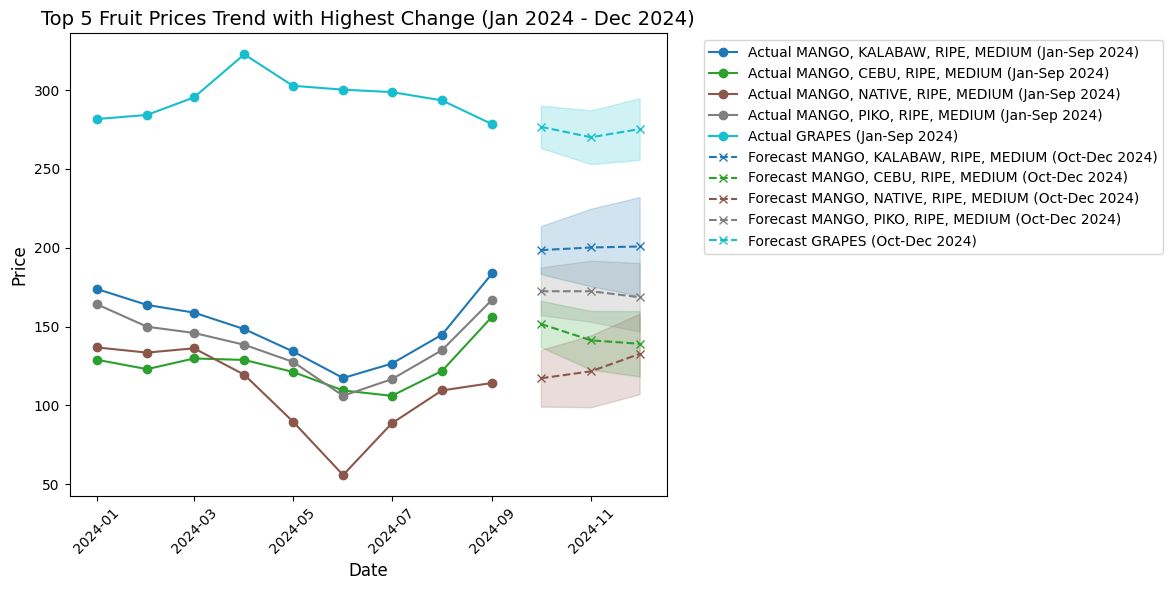

In [63]:
# Assign unique colors to each product
colors = plt.cm.get_cmap('tab10', len(top_5_changes['Product'].unique()))
color_dict = {product: colors(i) for i, product in enumerate(top_5_changes['Product'].unique())}

# Plot the data
plt.figure(figsize=(12, 6))

# Plot actual prices for top 5 products
for product in top_5_changes['Product'].unique():
  product_actual = actual_2024[actual_2024['Product'] == product]
  plt.plot(product_actual['Date'], product_actual['Price'], label=f'Actual {product} (Jan-Sep 2024)', marker='o', color=color_dict[product])

# Plot forecast prices and confidence intervals for top 5 products
for product in top_5_changes['Product'].unique():
  product_forecast = forecast_2024[forecast_2024['Product'] == product]
  plt.plot(product_forecast['Date'], product_forecast['Forecast'], label=f'Forecast {product} (Oct-Dec 2024)', marker='x', linestyle='--', color=color_dict[product])
  plt.fill_between(product_forecast['Date'], product_forecast['Lower CI'], product_forecast['Upper CI'], color=color_dict[product], alpha=0.2)

# Add titles and labels
plt.title("Top 5 Fruit Prices Trend with Highest Change (Jan 2024 - Dec 2024)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
df_ph['Date'] = pd.to_datetime(df_ph['Year'] + '-' + df_ph['Month'] + '-01').dt.strftime('%B %Y')

df_ph

C:\Users\rojgi\AppData\Local\Temp\ipykernel_1548\3230441187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Product,Year,Month,Price,Region Abbreviation,Date
0,PHILIPPINES,AVOCADO,2018,January,63.90,NaN,January 2018
1,PHILIPPINES,"BANANA, CARDAVA, MEDIUM",2018,January,26.68,NaN,January 2018
2,PHILIPPINES,"BANANA, LAKATAN, MEDIUM",2018,January,52.06,NaN,January 2018
3,PHILIPPINES,"BANANA, LATUNDAN, MEDIUM",2018,January,36.55,NaN,January 2018
4,PHILIPPINES,"BANANA, SABA, MEDIUM",2018,January,32.33,NaN,January 2018
...,...,...,...,...,...,...,...
51871,PHILIPPINES,"MANDARIN, DALANGHITA, MEDIUM",2024,September,73.26,NaN,September 2024
51872,PHILIPPINES,"CALAMANSI, LOOSE",2024,September,80.70,NaN,September 2024
51873,PHILIPPINES,"APPLE, RED DELICIOUS, MEDIUM",2024,September,126.85,NaN,September 2024
51874,PHILIPPINES,"CANTALOUPE, MELON, MEDIUM",2024,September,59.13,NaN,September 2024


In [65]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add traces for each product
for product in df_ph['Product'].unique():
  product_data = df_ph[df_ph['Product'] == product]
  fig.add_trace(go.Scatter(
    x=product_data['Date'],
    y=product_data['Price'],
    mode='lines+markers',
    name=product
  ))

# Update layout
fig.update_layout(
  title="Interactive Price Trend of Fruits from 2018 to 2024",
  xaxis_title="Date",
  yaxis_title="Price",
  legend_title="Product",
  xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

In [68]:
# Read the Excel file named 'inflationrate.xlsx' and store it in a DataFrame
df_inflation = pd.read_excel("inflationrate.xlsx")

# Display the first few rows of the DataFrame to verify the content
df_inflation.head()

,Date,InflationRate,FoodInflation
0,2018-01-01,3.4,4.4
1,2018-02-01,3.8,4.8
2,2018-03-01,4.3,5.9
3,2018-04-01,4.5,5.9
4,2018-05-01,4.6,5.7


In [70]:
df_inflation['Date'] = df_inflation['Date'].dt.strftime('%B %Y')
df_inflation.head()

,Date,InflationRate,FoodInflation
0,January 2018,3.4,4.4
1,February 2018,3.8,4.8
2,March 2018,4.3,5.9
3,April 2018,4.5,5.9
4,May 2018,4.6,5.7


In [71]:
# Merge df_ph with df_inflation based on the 'Date' column
df_ph_merged = pd.merge(df_ph, df_inflation, on='Date', how='left')

# Display the merged DataFrame
df_ph_merged.head()

,Region,Product,Year,Month,Price,Region Abbreviation,Date,InflationRate,FoodInflation
0,PHILIPPINES,AVOCADO,2018,January,63.90,NaN,January 2018,3.4,4.4
1,PHILIPPINES,"BANANA, CARDAVA, MEDIUM",2018,January,26.68,NaN,January 2018,3.4,4.4
2,PHILIPPINES,"BANANA, LAKATAN, MEDIUM",2018,January,52.06,NaN,January 2018,3.4,4.4
3,PHILIPPINES,"BANANA, LATUNDAN, MEDIUM",2018,January,36.55,NaN,January 2018,3.4,4.4
4,PHILIPPINES,"BANANA, SABA, MEDIUM",2018,January,32.33,NaN,January 2018,3.4,4.4


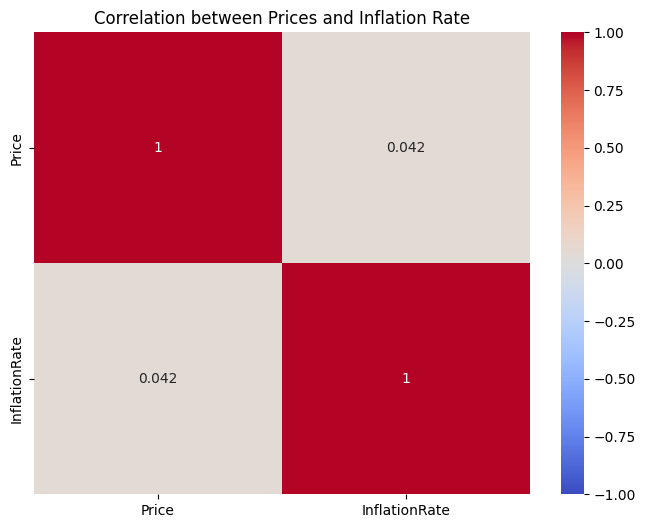

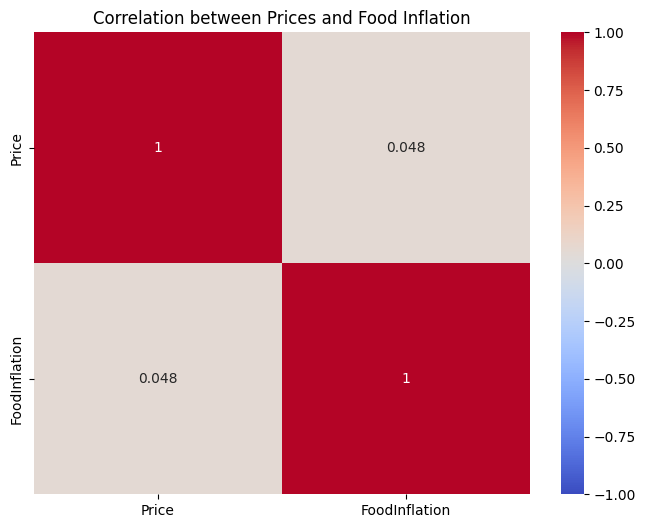

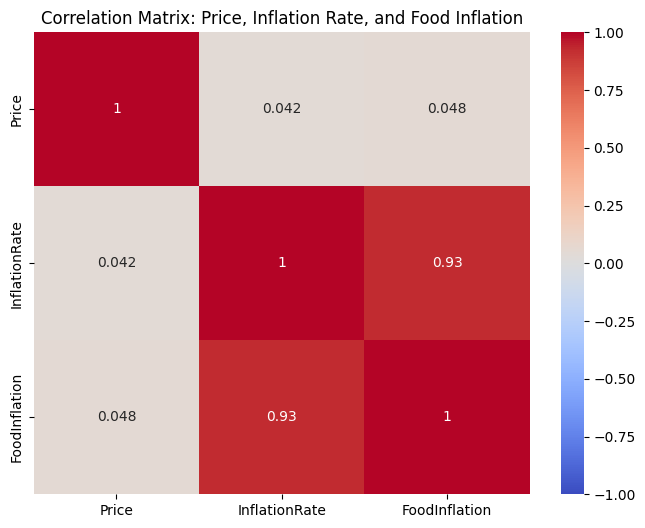

In [76]:
# Merge df_ph with df_inflation based on the 'Date' column
df_ph_merged = pd.merge(df_ph, df_inflation, on='Date', how='left')

# Calculate the correlation matrix for InflationRate
correlation_inflation = df_ph_merged[['Price', 'InflationRate']].corr()

# Calculate the correlation matrix for FoodInflation
correlation_food_inflation = df_ph_merged[['Price', 'FoodInflation']].corr()

# Plot the correlation matrix for InflationRate
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_inflation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Prices and Inflation Rate')
plt.show()

# Plot the correlation matrix for FoodInflation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_food_inflation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Prices and Food Inflation')
plt.show()

# Calculate the correlation matrix for Price, InflationRate, and FoodInflation
correlation_matrix = df_ph_merged[['Price', 'InflationRate', 'FoodInflation']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Price, Inflation Rate, and Food Inflation')
plt.show()

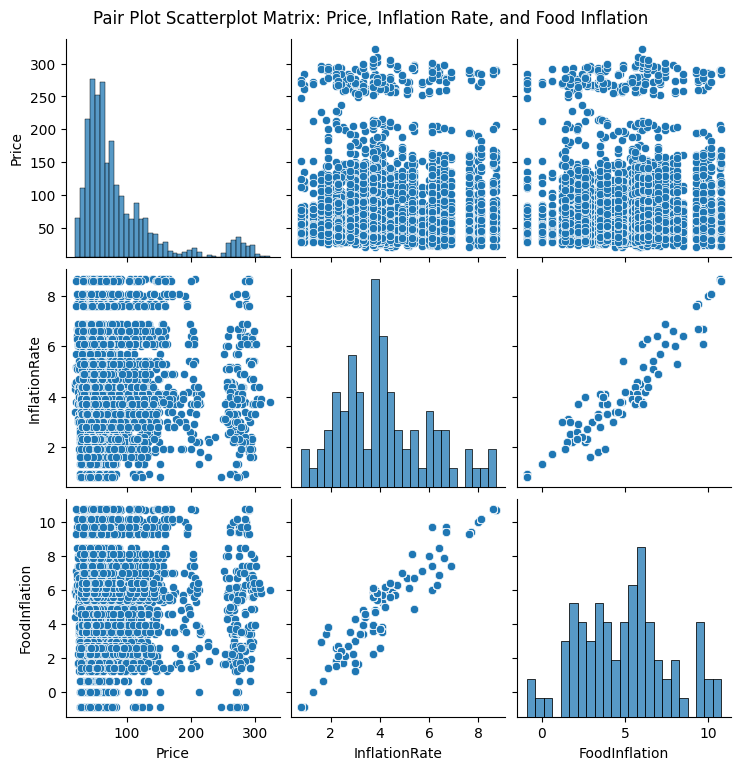

In [74]:
# Pair plot scatterplot matrix for Price, InflationRate, and FoodInflation
sns.pairplot(df_ph_merged[['Price', 'InflationRate', 'FoodInflation']])
plt.suptitle('Pair Plot Scatterplot Matrix: Price, Inflation Rate, and Food Inflation', y=1.02)
plt.show()
